In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kidneydisease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,Unnamed: 26
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,NaN
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,NaN
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [6]:
df.classification=df.classification.replace("ckd\t","ckd") 

In [7]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [8]:
df.drop('id', axis = 1, inplace = True)

In [9]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,Unnamed: 26
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000,NaN,no,no,no,good,no,no,ckd,NaN
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500,NaN,no,yes,no,poor,no,yes,ckd,NaN
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300,4.6,no,no,no,good,no,no,ckd,NaN


In [10]:
df['classification'] = df['classification'].replace(['ckd','notckd'], [1,0])

In [11]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,Unnamed: 26
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800,5.2,yes,yes,no,good,no,no,1,NaN
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000,NaN,no,no,no,good,no,no,1,NaN
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500,NaN,no,yes,no,poor,no,yes,1,NaN
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700,3.9,yes,no,no,poor,yes,yes,1,NaN
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300,4.6,no,no,no,good,no,no,1,NaN


In [12]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
Unnamed: 26       400
dtype: int64

In [13]:
data = df.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (0, 26)
After dropping all NaN values: (400, 26)


In [14]:
data.index = range(0,len(data),1)

In [15]:
for i in data['wc']:
    print(i)

In [16]:
data['wc']=data['wc'].replace(["\t6200","\t8400"],[6200,8400])

In [17]:
for i in data['wc']:
    print(i)

In [18]:
data['pcv']=data['pcv'].astype(int)
data['wc']=data['wc'].astype(int)
data['rc']=data['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [19]:
object_dtypes = data.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane


In [20]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [21]:
df=df.replace(dictonary)

<Axes: >

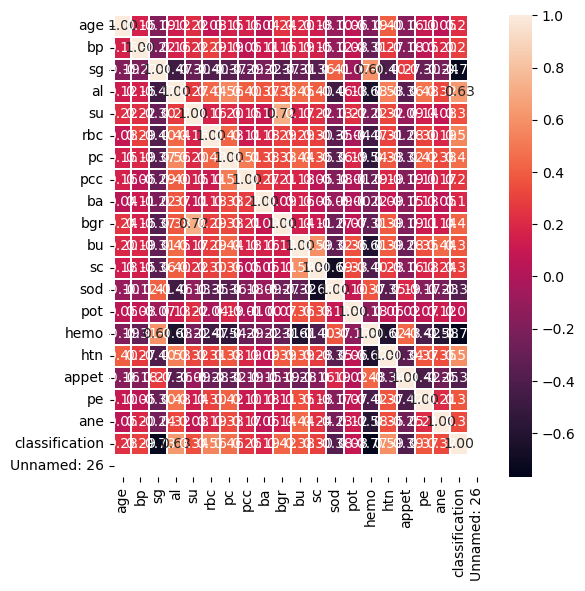

In [22]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.1)

In [23]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,htn,appet,pe,ane,classification,Unnamed: 26
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.079987,0.150867,0.157693,0.042160,0.244992,...,0.132531,-0.100046,0.058377,-0.192928,0.400254,-0.161168,0.097621,0.053346,0.227268,NaN
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.294129,0.189310,0.057891,0.111204,0.160193,...,0.146222,-0.116422,0.075151,-0.306540,0.271301,-0.177914,0.054045,0.197345,0.294077,NaN
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.395774,-0.374407,-0.291618,-0.220656,-0.374710,...,-0.361473,0.412190,-0.072787,0.602582,-0.400085,0.268498,-0.298618,-0.242699,-0.732163,NaN
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.437873,0.558535,0.401284,0.368373,0.379464,...,0.399198,-0.459896,0.129038,-0.634632,0.525756,-0.357455,0.477274,0.321187,0.627090,NaN
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.164609,0.202815,0.151222,0.107047,0.717827,...,0.223244,-0.131776,0.219450,-0.224775,0.321933,-0.087417,0.143085,0.075233,0.344070,NaN
rbc,0.079987,0.294129,-0.395774,0.437873,0.164609,1.000000,0.426395,0.110282,0.180657,0.293097,...,0.301159,-0.346578,-0.035086,-0.471575,0.306579,-0.282708,0.302234,0.189951,0.555097,NaN
pc,0.150867,0.189310,-0.374407,0.558535,0.202815,0.426395,1.000000,0.514578,0.329655,0.329612,...,0.356734,-0.358833,0.185211,-0.541903,0.383096,-0.316625,0.415723,0.329643,0.461812,NaN
pcc,0.157693,0.057891,-0.291618,0.401284,0.151222,0.110282,0.514578,1.000000,0.274491,0.208856,...,0.048553,-0.180640,-0.008385,-0.285726,0.192673,-0.187932,0.102485,0.174364,0.263226,NaN
ba,0.042160,0.111204,-0.220656,0.368373,0.107047,0.180657,0.329655,0.274491,1.000000,0.093582,...,0.049837,-0.089411,-0.003232,-0.219461,0.086668,-0.147872,0.133500,0.051001,0.185345,NaN
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,0.293097,0.329612,0.208856,0.093582,1.000000,...,0.114875,-0.267848,0.066966,-0.306189,0.390203,-0.185179,0.108686,0.140121,0.419672,NaN


In [24]:
X = data.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = data['classification']

In [25]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane', 'Unnamed: 26'],
      dtype='object')